# Predictive Analysis on Telecom Customer Churn Data

In [1]:
## Import necessary liberaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Upload the Telecom-Customer-Churn data

data = pd.read_csv('Telco-Customer-Churn.csv')

Check the summary statistics of the data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [66]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## EDA

<Figure size 432x288 with 0 Axes>

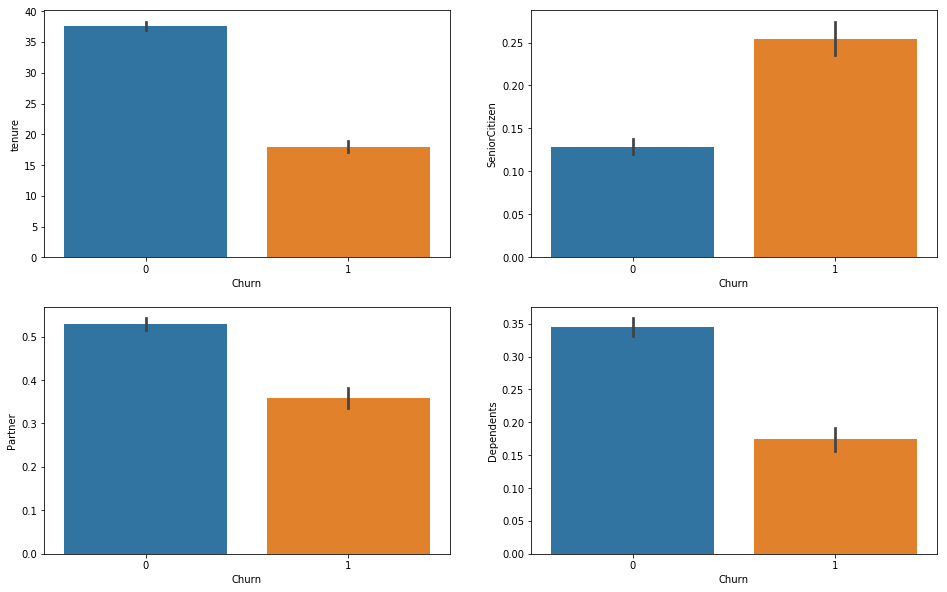

In [97]:
plt.figure(1)

plt.figure(figsize=(16,10))

plt.subplot(221)
sns.barplot(x = data.Churn ,y = data.tenure )
plt.title('')

plt.subplot(222)
sns.barplot(x = data.Churn ,y = data.SeniorCitizen )

plt.subplot(223)
sns.barplot(x = data.Churn ,y = data.Partner )

plt.subplot(224)
sns.barplot(x = data.Churn ,y = data.Dependents )

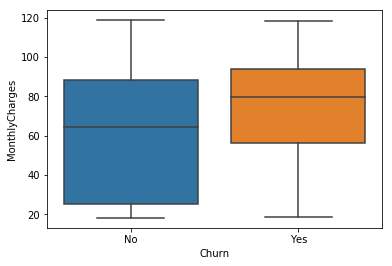

In [88]:
sns.boxplot(x = data.Churn, y = data.MonthlyCharges)

In [90]:
## Maping the variable with argument as 'Yes' and 'No'

data.Partner = data.Partner.map({"Yes" : 1,"No" : 0})
data.PhoneService = data.PhoneService.map({"Yes" : 1,"No" : 0})
data.Dependents = data.Dependents.map({"Yes" : 1,"No" : 0})
data.PaperlessBilling = data.PaperlessBilling.map({"Yes" : 1,"No" : 0})
data.Churn = data.Churn.map({"Yes" : 1,"No" : 0})

In [60]:
## The Yes and No arguments has been changed to 1 and 0
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(7), object(1

In [10]:
## To see all the columns

pd.set_option('display.max_columns',None)

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [12]:
pd.DataFrame({"Unique":data.nunique()})

,Unique
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [13]:
## data to dummify Gender, MultipleLines, Internet Service, ONline Security, Online Backup, Device protection, tech support,

## Streaming tv, streaming Movies, Contract, Payment Method, 

In [15]:
Gen = pd.get_dummies(data['gender'], prefix='gender')
data = pd.concat([data,Gen],1)
data = data.drop(['gender'],1) ## Droping the original one from the DataFrame

ML = pd.get_dummies(data['MultipleLines'], prefix='MultipleLines')
data = pd.concat([data,ML],1)
data = data.drop(['MultipleLines'],1) ## Droping the original one from the DataFrame

Int = pd.get_dummies(data['InternetService'], prefix='InternetService')
data = pd.concat([data,Int],1)
data = data.drop(['InternetService'],1) ## Droping the original one from the DataFrame

ons = pd.get_dummies(data['OnlineSecurity'], prefix='OnlineSecurity')
data = pd.concat([data,ons],1)
data = data.drop(['OnlineSecurity'],1)  ## Droping the original one from the DataFrame

onb = pd.get_dummies(data['OnlineBackup'], prefix='OnlineBackup')
data = pd.concat([data,onb],1)
data = data.drop(['OnlineBackup'],1) ## Droping the original one from the DataFrame

dep = pd.get_dummies(data['DeviceProtection'], prefix='DeviceProtection')
data = pd.concat([data,dep],1)
data = data.drop(['DeviceProtection'],1) ## Droping the original one from the DataFrame

ts = pd.get_dummies(data['TechSupport'], prefix='TechSupport')
data = pd.concat([data,ts],1)
data = data.drop(['TechSupport'],1) ## Droping the original one from the DataFrame

st = pd.get_dummies(data['StreamingTV'], prefix='StreamingTV')
data = pd.concat([data,st],1)
data = data.drop(['StreamingTV'],1) ## Droping the original one from the DataFrame

stm = pd.get_dummies(data['StreamingMovies'], prefix='StreamingMovies')
data = pd.concat([data,stm],1)
data = data.drop(['StreamingMovies'],1) ## Droping the original one from the DataFrame

con = pd.get_dummies(data['Contract'], prefix='Contract')
data = pd.concat([data,con],1)
data = data.drop(['Contract'],1)  ## Droping the original one from the DataFrame

pay = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data,pay],1)
data = data.drop(['PaymentMethod'],1)  ## Droping the original one from the DataFrame

In [16]:
data.shape

(7043, 43)

In [17]:
## All the required variables are dummified
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.5,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [19]:
## Checking the Null value if any 
data.isnull().sum()

customerID                                 0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
customerID                                 7043 non-null object
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null object
Churn                                      7043 non-null int64
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
Multipl

In [21]:
## Total charges is in object form. This needed to be converted into Numeric.

data.TotalCharges = data.TotalCharges.convert_objects(convert_numeric = True)

C:\Anaconda  1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [22]:
## Null values in total Charges
data.TotalCharges.isnull().sum()

11

In [23]:
## Filling the Null values with the mean values.

data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.mean())

In [5]:
## Checking if the Null values still exists

data.TotalCharges.isnull().sum()

0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
customerID                                 7043 non-null object
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null float64
Churn                                      7043 non-null int64
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
Multip

## Making the Model

In [26]:
## Importing the Necessary Liberary for modeling and scaling the data through Z score

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [27]:
## Split the data into dependent variable and indepentent variable

X = data.drop(['Churn','customerID'],1) ## Independent variables

Y = data.Churn  ## Dependent variables

In [28]:
## Splitting the data into train and test to make the model

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.7, test_size=0.3,
                                             random_state = 121)


In [29]:
## Checking the Shape of the 

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4930, 41)
(2113, 41)
(4930,)
(2113,)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion='entropy')
nb = GaussianNB()
rf = RandomForestClassifier()

In [32]:
knn.fit(xtrain,ytrain)
tree.fit(xtrain,ytrain)
nb.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)

C:\Anaconda  1\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
print('Knn score Before Scaling data')
print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))
print('-------------------------------')
print('Dtree Forest score Before Scaling data')
print(tree.score(xtrain,ytrain))
print(tree.score(xtest,ytest))
print('-------------------------------')
print('Neive score Before Scaling data')
print(nb.score(xtrain,ytrain))
print(nb.score(xtest,ytest))
print('-------------------------------')
print('Random Forest score Before Scaling data')
print(rf.score(xtrain,ytrain))
print(rf.score(xtest,ytest))

Knn score Before Scaling data
0.8383367139959432
0.759110269758637
-------------------------------
Dtree Forest score Before Scaling data
0.9977687626774848
0.7335541883577852
-------------------------------
Neive score Before Scaling data
0.6924949290060852
0.6966398485565547
-------------------------------
Random Forest score Before Scaling data
0.9787018255578094
0.7718883104590629


In [45]:
xtrains = xtrain.apply(zscore)
xtests = xtest.apply(zscore)


In [35]:
print('Knn score after Scaling data')
print(knn.score(xtrains,ytrain))
print(knn.score(xtests,ytest))
print('-------------------------------')
print('Dtree score after Scaling data')
print(tree.score(xtrains,ytrain))
print(tree.score(xtests,ytest))
print('-------------------------------')
print('Neive score after Scaling data')
print(nb.score(xtrains,ytrain))
print(nb.score(xtests,ytest))
print('-------------------------------')
print('Random Forest score after Scaling data')
print(rf.score(xtrains,ytrain))
print(rf.score(xtests,ytest))

Knn score after Scaling data
0.7399594320486815
0.7221959299574066
-------------------------------
Dtree score after Scaling data
0.6634888438133875
0.6597255087553242
-------------------------------
Neive score after Scaling data
0.7578093306288033
0.7378135352579271
-------------------------------
Random Forest score after Scaling data
0.716024340770791
0.6819687647893989


In [36]:
pred_knn = knn.fit(xtrains,ytrain).predict(xtests)
pred_tree = tree.fit(xtrains,ytrain).predict(xtests)
pred_nb = nb.fit(xtrains,ytrain).predict(xtests)
pred_rf = rf.fit(xtrains,ytrain).predict(xtests)

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [38]:
Knn_score = accuracy_score(ytest,pred_knn)
tree_score = accuracy_score(ytest,pred_tree)
nb_score = accuracy_score(ytest,pred_nb)
rf_score = accuracy_score(ytest,pred_rf) 

In [39]:
print(Knn_score)
print(tree_score)
print(nb_score)
print(rf_score)

0.7600567912920019
0.7193563653573118
0.6980596308566019
0.7714150496923805


In [40]:
## Ensemble Technique

In [99]:
from sklearn.ensemble import BaggingClassifier

bag_tree = BaggingClassifier(base_estimator=tree,n_estimators=30,random_state=12)

bag_tree_pred = bag_tree.fit(xtrains,ytrain).predict(xtests)

In [59]:
accuracy_score(ytest,bag_pred)

0.7657359204921912

In [115]:
Knn1 = KNeighborsClassifier(n_neighbors= 15)

bag_knn = BaggingClassifier(base_estimator=Knn1,n_estimators=30,random_state=12)

bag_knn_pred = bag_knn.fit(xtrains,ytrain).predict(xtests)

accuracy_score(ytest,bag_knn_pred)

0.7718883104590629

In [103]:
bag_nb = BaggingClassifier(base_estimator=nb,n_estimators=30,random_state=12)

bag_nb_pred = bag_nb.fit(xtrains,ytrain).predict(xtests)

accuracy_score(ytest,bag_nb_pred)

0.6985328916232845

In [106]:
## Will check the Boosting Method on all the model.

from sklearn.ensemble import AdaBoostClassifier

In [112]:
NB_boost = AdaBoostClassifier(base_estimator=nb,n_estimators=30)
boost_NB_pred = NB_boost.fit(xtrains,ytrain).predict(xtests)
print(accuracy_score(ytest,boost_NB_pred))

RF_boost = AdaBoostClassifier(base_estimator=rf,n_estimators=30)
boost_RF_pred = RF_boost.fit(xtrains,ytrain).predict(xtests)
print(accuracy_score(ytest,boost_RF_pred))


DT_boost = AdaBoostClassifier(n_estimators=30)
boost_DT_pred = NB_boost.fit(xtrains,ytrain).predict(xtests)
print(accuracy_score(ytest,boost_DT_pred))


0.5168007572172267
0.7690487458589683
0.5168007572172267


In [ ]:
import sklearn as sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [121]:
## Hyper Parameter tuning

from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=5,scoring="accuracy" )
GS.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [122]:
GS.best_params_

{'n_neighbors': 21, 'weights': 'uniform'}

In [123]:
knn = KNeighborsClassifier(n_neighbors=21)
pred_knnr = knn.fit(xtrains,ytrain).predict(xtests)
accuracy_score(ytest,pred_knnr)

0.7827733080927591

In [125]:
bag_knnr = BaggingClassifier(base_estimator=knn,n_estimators=30,random_state=12)

bag_knnr_pred = bag_knnr.fit(xtrains,ytrain).predict(xtests)

accuracy_score(ytest,bag_knnr_pred)

0.7818267865593942